<a href="https://colab.research.google.com/github/naga-satvika/Anamoly-detection/blob/main/Anamoly_detection_using_Isolation_Forest_Algorithm_Thales_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.ensemble import IsolationForest

data = pd.DataFrame({
    'user_id': [1, 1, 2, 2, 3, 3],
    'login_time': [8, 18, 7, 20, 8, 17],
    'ip_address': ['192.168.1.1', '192.168.1.2', '192.168.1.1', '192.168.1.3', '192.168.1.4', '192.168.1.1']
})

data['ip_encoded'] = data['ip_address'].astype('category').cat.codes

X = data[['login_time', 'ip_encoded']]

model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

data['anomaly'] = model.predict(X)
print(data)

   user_id  login_time   ip_address  ip_encoded  anomaly
0        1           8  192.168.1.1           0        1
1        1          18  192.168.1.2           1        1
2        2           7  192.168.1.1           0        1
3        2          20  192.168.1.3           2        1
4        3           8  192.168.1.4           3       -1
5        3          17  192.168.1.1           0        1


In [6]:
import pandas as pd
from sklearn.ensemble import IsolationForest

data = pd.DataFrame({
    'user_id': [1, 1, 2, 2, 3, 3],
    'login_time': [8, 18, 7, 20, 8, 17],  # 24-hour format
    'ip_address': ['192.168.1.1', '192.168.1.2', '192.168.1.1', '192.168.1.3', '192.168.1.4', '192.168.1.1'],
    'device_type': ['laptop', 'mobile', 'laptop', 'tablet', 'desktop', 'laptop'],
    'browser_type': ['chrome', 'firefox', 'chrome', 'safari', 'chrome', 'edge'],
    'location': ['New York', 'New York', 'Los Angeles', 'New York', 'Chicago', 'New York']
})

data['ip_encoded'] = data['ip_address'].astype('category').cat.codes
data['device_encoded'] = data['device_type'].astype('category').cat.codes
data['browser_encoded'] = data['browser_type'].astype('category').cat.codes
data['location_encoded'] = data['location'].astype('category').cat.codes

X = data[['login_time', 'ip_encoded', 'device_encoded', 'browser_encoded', 'location_encoded']]

model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

data['anomaly'] = model.predict(X)
print(data)


   user_id  login_time   ip_address device_type browser_type     location  \
0        1           8  192.168.1.1      laptop       chrome     New York   
1        1          18  192.168.1.2      mobile      firefox     New York   
2        2           7  192.168.1.1      laptop       chrome  Los Angeles   
3        2          20  192.168.1.3      tablet       safari     New York   
4        3           8  192.168.1.4     desktop       chrome      Chicago   
5        3          17  192.168.1.1      laptop         edge     New York   

   ip_encoded  device_encoded  browser_encoded  location_encoded  anomaly  
0           0               1                0                 2        1  
1           1               2                2                 2        1  
2           0               1                0                 1        1  
3           2               3                3                 2        1  
4           3               0                0                 0       -1  
5   

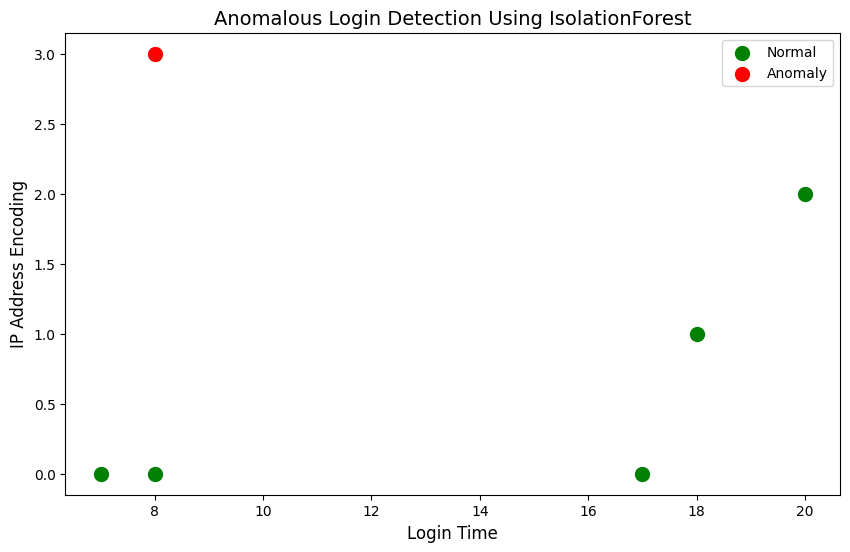

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data[data['anomaly'] == 1]['login_time'],
            data[data['anomaly'] == 1]['ip_encoded'],
            color='g', label='Normal', s=100)

plt.scatter(data[data['anomaly'] == -1]['login_time'],
            data[data['anomaly'] == -1]['ip_encoded'],
            color='r', label='Anomaly', s=100)
plt.title('Anomalous Login Detection Using IsolationForest', fontsize=14)
plt.xlabel('Login Time', fontsize=12)
plt.ylabel('IP Address Encoding', fontsize=12)
plt.legend()
plt.show()
